In [2]:
import numpy as np
# from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
from astropy.convolution import convolve_fft, convolve, Gaussian2DKernel
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import colorcet
import matplotlib as mpl
from glob import glob

plt.style.use('paper')

In [3]:
inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_lowres/HNCO_7m12mTP_CubeMosaic_downsample9.contsub.masked.max.fits'
inputfile_max_nomask = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_lowres/HNCO_7m12mTP_CubeMosaic_downsample9.contsub.max.fits'
inputfile_rgb_fits = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/data_regrid/hershel160.fits'
inputfile_rgb_png = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/rgb_final_uncropped.jpeg'

hdu_max = fits.open(inputfile_max)[0]
hdu_max.data[hdu_max.data==0] = np.nan
hdu_max.data = np.squeeze(hdu_max.data)
del hdu_max.header['*3*']

hdu_max_nomask = fits.open(inputfile_max_nomask)[0]
hdu_max_nomask.data[hdu_max_nomask.data==0] = np.nan
hdu_max_nomask.data = np.squeeze(hdu_max_nomask.data)
del hdu_max_nomask.header['*3*']

hdu_max_mask = fits.PrimaryHDU(~np.isnan(hdu_max_nomask.data)*1, hdu_max_nomask.header)

NameError: name 'l' is not defined

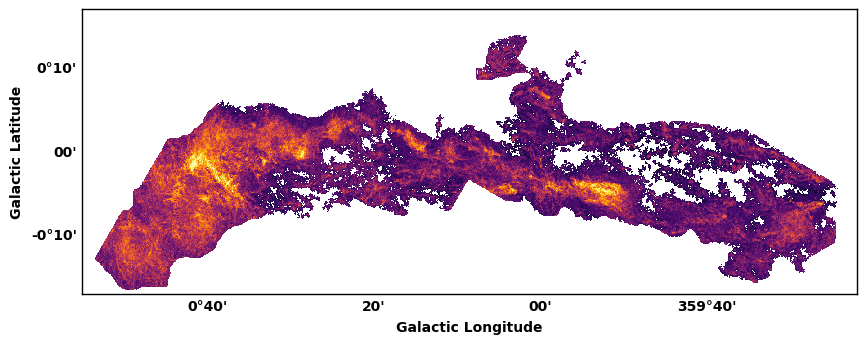

In [4]:
# Plasma zoom
fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max.data, [0.05,99.9])
ax.show_colorscale(cmap='inferno', vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('white')
ax.add_scalebar(500*u.arcsec, corner='bottom', color='black')
ax.scalebar.set_label('20pc')
ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
# fig.savefig('../figures/cont.pdf', bbox_inches='tight', dpi=300)
fig.savefig('../figures/hnco.png', bbox_inches='tight', dpi=300)

No contour levels were found within the data range.


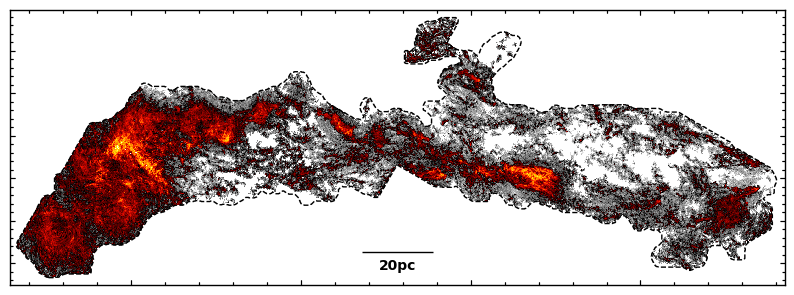

In [5]:
# Fire zoom

# Zoom
l = 0.1434157
b = -0.0227146
width = 1.5206124
height = 0.5397166


cmap1 = plt.cm.binary(np.linspace(0., 1, 40))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**0.5

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [0.1,99.99])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='linear')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('white')
ax.add_scalebar(500*u.arcsec, corner='bottom', color='black')
ax.scalebar.set_label('20pc')

ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire.png', bbox_inches='tight', dpi=300)

In [6]:
# Wide Region

l = 0.1434157
b = -0.0227146
width = 2
height = 2.7

No contour levels were found within the data range.


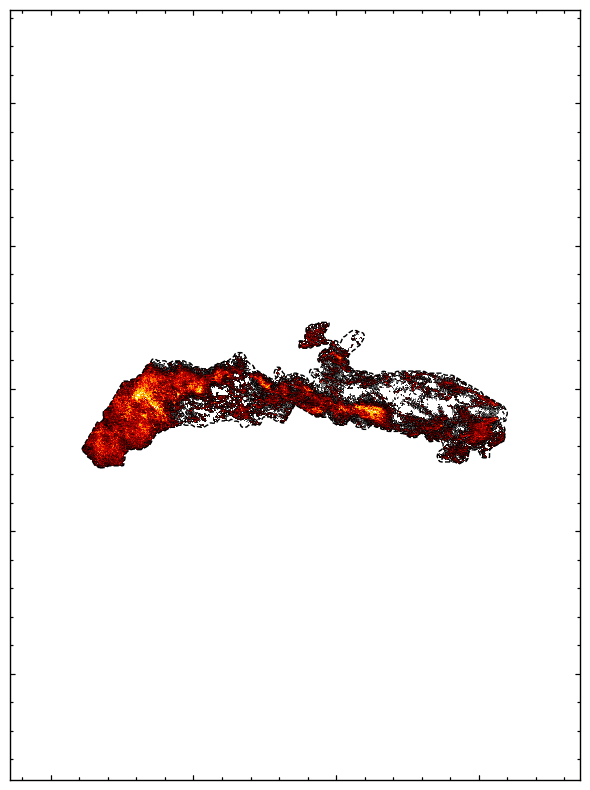

In [7]:
# Fire trans
cmap1 = plt.cm.binary(np.linspace(0., 1, 40))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max.data, [0.05,99.9])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=1, linestyles='--')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras.png', dpi=300)

No contour levels were found within the data range.


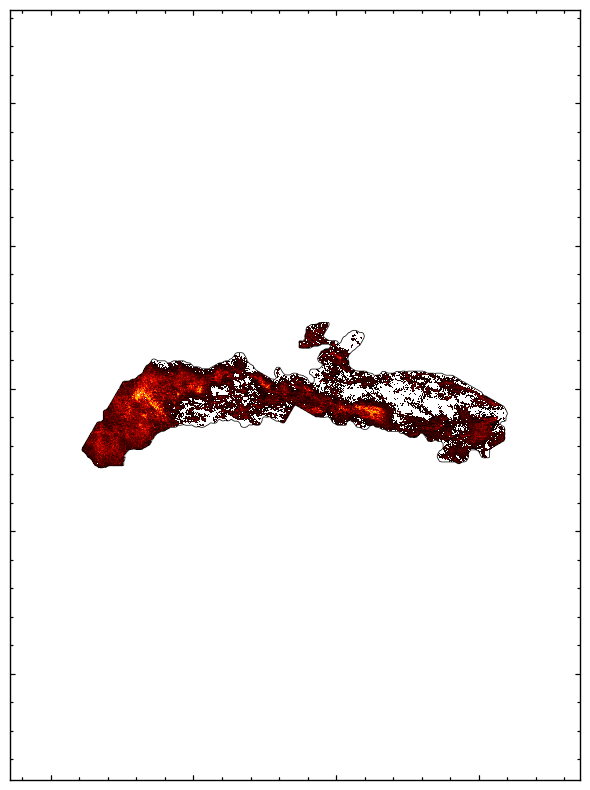

In [8]:
# Fire trans2
cmap1 = plt.cm.binary(np.linspace(0., 1, 40))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under('none')
cmap.set_bad('none')

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**0.75

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [10,99.99])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='linear')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=0.5, linestyles='-')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras2.png', dpi=300, transparent=True)

No contour levels were found within the data range.


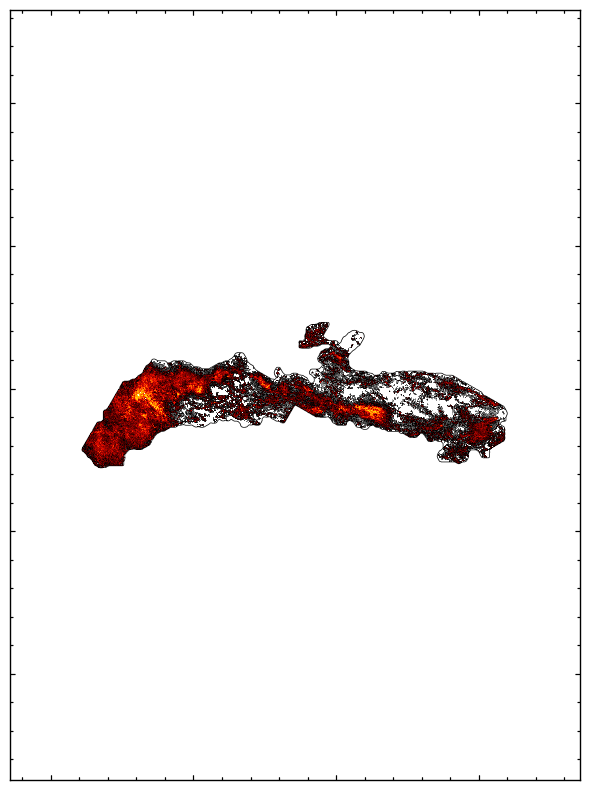

In [9]:
# Fire trans2
cmap1 = plt.cm.binary(np.linspace(0., 1, 40))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under('none')
cmap.set_bad('none')

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**1

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [0.1,99.99])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=0.5, linestyles='-')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras3.png', dpi=300, transparent=True)

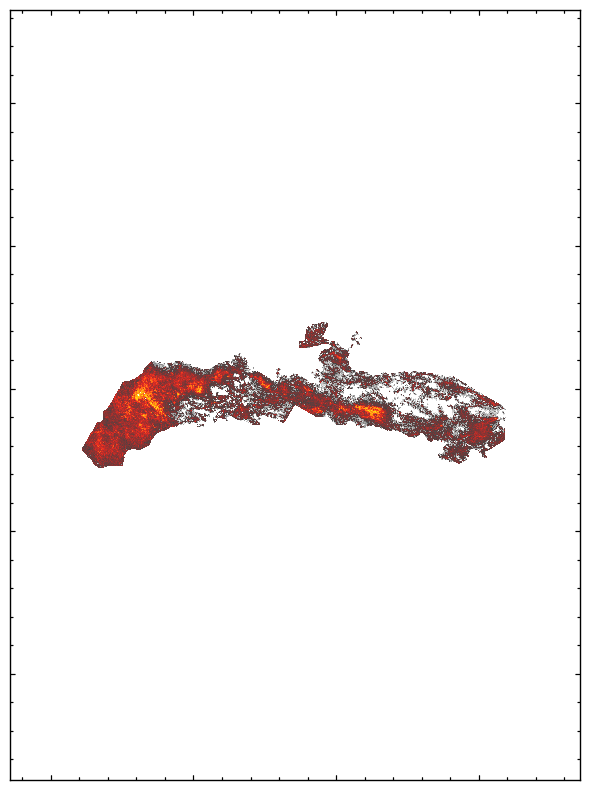

In [48]:
# Fire trans2

cmap = plt.cm.binary
cmap1 = cmap(np.linspace(0., 1, 32))
cmap1[:,-1] = np.linspace(0, 0.5, len(cmap1)) # Set alpha
# cmap1 = mpl.colors.ListedColormap(cmap1)

cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmap2[:,-1] = np.linspace(0.75, 1, len(cmap2)) # Set alpha
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under('none')
cmap.set_bad('none')

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**1

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [0,99.99])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

# ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=0.5, linestyles='-')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras3.png', dpi=300, transparent=True)
fig.savefig('../figures/hnco_fire_tras3.pdf', dpi=300, transparent=True)

No contour levels were found within the data range.


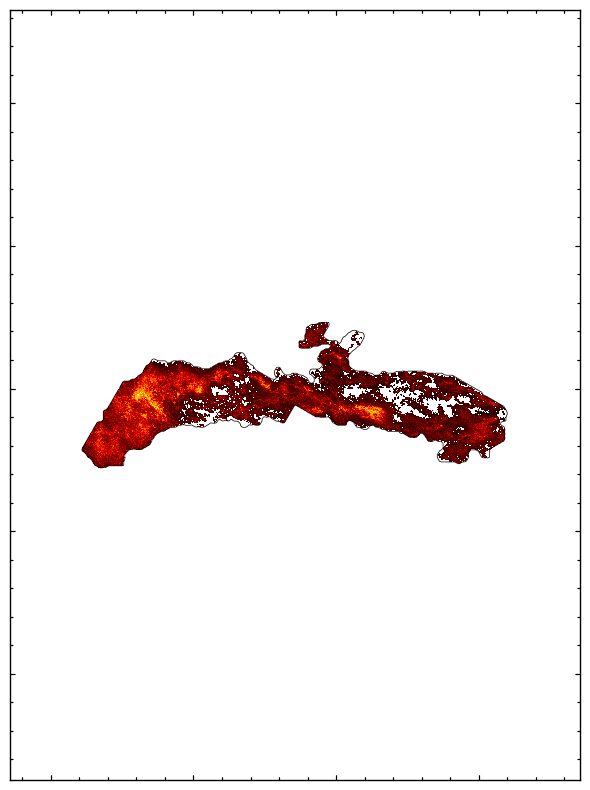

In [51]:
# Fire trans4
cmap1 = plt.cm.binary(np.linspace(0., 1, 40))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under('none')
cmap.set_bad('none')

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**0.5

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [0.1,99.99])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='linear')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=0.5, linestyles='-')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras4.png', dpi=300, transparent=True)

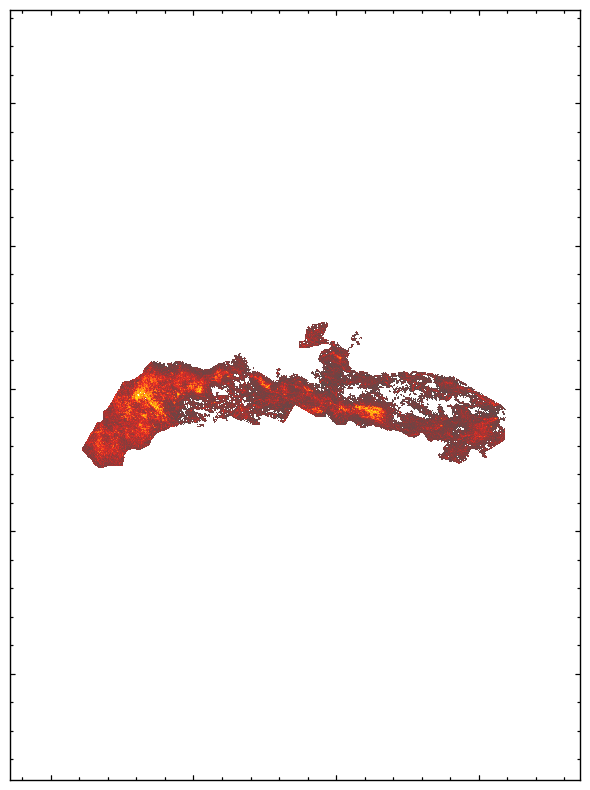

In [59]:
# Fire trans4
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
alpha_arr = np.linspace(0.5, 1, len(cmap2))
alpha_arr = alpha_arr**0.5
cmap2[:,-1] = alpha_arr/np.nanmax(alpha_arr) # Set alpha

cmaplist = np.vstack((cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under('none')
cmap.set_bad('none')

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**0.5

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [0.1,99.99])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='linear')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

# ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=0.5, linestyles='-')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras5.png', dpi=300, transparent=True)

No contour levels were found within the data range.


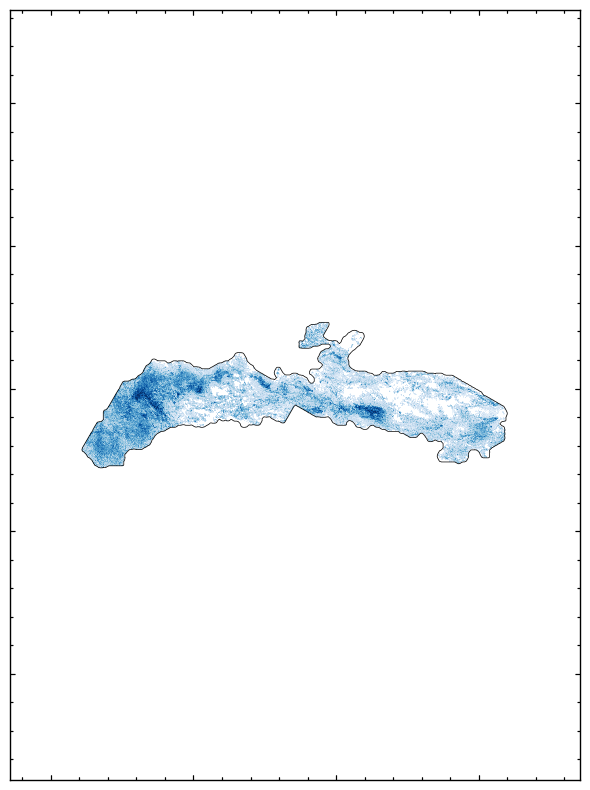

In [11]:
# Fire cool
cmap1 = plt.cm.binary(np.linspace(0., 1, 40))
cmap2 = plt.cm.Blues(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under('none')
cmap.set_bad('none')

hdu_max_ = hdu_max.copy()
hdu_max_.data = hdu_max.data**0.25

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_max_, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_max_.data, [0.1,99.9])
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='linear')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('none')

ax.show_contour(hdu_max_mask, levels=[0], colors='black', linewidths=0.5, linestyles='-')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/hnco_fire_tras4.png', dpi=300, transparent=True)